# Principal Component Analysis in Villes Dataset

### Description: 
This code example tries to emulate the example of "Aprender de los Datos, El Análisis de Componentes Principales, una aproximación desde el Data Mining" book of "Tomas Aluja" and "Alain Morineau"

## Project: 
[r-examples](https://github.com/garciparedes/r-examples)

## Author: 
[Sergio García Prado](garciparedes.me)

### Date: 
2017-12

In [14]:
rm(list = ls())

In [15]:
column.index <- function(data, columns.name) {
  match(columns.name, colnames(data))
}

In [16]:
filter.by.factor <- function(data, columns.name, factor, columns.remove = TRUE) {
  col.index <- column.index(data, columns.name)
  indexer <- is.element(villes[, col.index], factor)
  if (columns.remove) {
    return(data[indexer, - col.index])
  } else {
    return(data[indexer, ])
  }
}

In [17]:
filter.by.columns <- function(data, columns.name, reverse = FALSE) {
  col.index <- column.index(data, columns.name)
  if (reverse){
    col.index <- - col.index
  }
  return(data[, col.index])
}

In [18]:
filter.complete <- function(data) {
  data[complete.cases(data),]
}

In [19]:
villes <- as.data.frame(read.csv("./../datasets/villes.csv"))
summary(villes)  

         Ciudad              Año                 Región.del.mundo
 AbuDhabi91 :  1   Edition 1991:53   CENTRAL EUROPE      :18     
 AbuDhabi94 :  1   edition 1994:53   NORD AMERIQUE       :14     
 Amsterdam91:  1                     NORD EUROPE         :12     
 Amsterdam94:  1                     SUD AMERIQUE        :12     
 Athenes91  :  1                     SUD ASIE ET AUSTRALI:12     
 Athenes94  :  1                     EST ASIE            :10     
 (Other)    :100                     (Other)             :28     
 Indice.precios.sin.alquiler Indice.precio.con.alquiler Indice.salarios.bruto
 Min.   : 30.3               Min.   : 30.20             Min.   :  2.10       
 1st Qu.: 52.8               1st Qu.: 55.90             1st Qu.: 14.40       
 Median : 67.5               Median : 71.30             Median : 43.00       
 Mean   : 68.1               Mean   : 71.76             Mean   : 41.83       
 3rd Qu.: 80.4               3rd Qu.: 85.60             3rd Qu.: 65.40       
 Max

In [20]:
head(villes)

Ciudad,Año,Región.del.mundo,Indice.precios.sin.alquiler,Indice.precio.con.alquiler,Indice.salarios.bruto,Indice.salarios.neto,Horas.anuales.de.trabajo,Vacaciones.anuales.pagadas,Poder.compra.bruto,⋯,Mecánico.Med.1,Obrero.constr.Med.1,Tornero.Med.1,Jefe.de.cocina.Med.1,Diretor.fábrica.Med.1,Ingeniero.Med.1,Cajero.banco.Med.1,Secretaria.dirección.Med.1,Dependienta.Med.1,Trabajador.text.Med.1
AbuDhabi91,Edition 1991,PROCHE ORIENT,NA,NA,NA,NA,NA,NA,NA,⋯,,,,,,,,,,
AbuDhabi94,edition 1994,PROCHE ORIENT,71.3,78.1,29.9,38.0,2100,28.9,42.0,⋯,0.5770 0.68,0.1330 0.26,0.1312 0.75,2.2949 2.48,6.5651 9.13,3.9393 4.37,3.2258 3.50,1.0769 1.11,1.0769 1.13,0.1312 0.36
Amsterdam91,Edition 1991,CENTRAL EUROPE,65.6,65.7,56.9,49.0,1714,31.9,86.7,⋯,0.8876 0.90,0.9425 0.96,1.0820 1.09,1.0602 1.07,1.9101 1.94,1.8450 1.88,1.0949 1.11,1.1070 1.12,0.8820 0.90,0.8074 0.83
Amsterdam94,edition 1994,CENTRAL EUROPE,68.8,70.3,61.4,53.7,1792,27.5,89.3,⋯,0.8655 0.87,0.7819 0.79,1.3147 1.34,0.8712 0.95,1.9935 2.04,1.9597 1.98,1.3495 1.36,1.0202 1.03,0.7619 0.77,0.8074 0.83
Athenes91,Edition 1991,SUD EUROPE,53.8,55.6,30.2,30.4,1792,23.5,56.1,⋯,0.9784 1.00,1.1152 1.13,1.6435 1.88,1.5613 1.69,1.5623 1.58,1.6746 1.72,1.1088 1.14,0.7567 0.83,0.5198 0.54,0.6574 0.66
Athenes94,edition 1994,SUD EUROPE,54.4,56.7,27.7,28.5,1775,24.5,50.9,⋯,0.6898 0.75,1.1152 1.13,1.0959 1.10,1.2568 1.27,1.4141 1.45,1.4946 1.54,1.2647 1.31,1.0202 1.03,0.6595 0.68,0.7037 0.71


In [21]:
cols <- c("Ciudad", "Región.del.mundo", "Maestro", "Chófer.de.autobús",
          "Mecánico.de.coche", "Obrero.de.la.construcción", "Tornero", 
          "Jefe.de.cocina", "Director.de.fábrica", "Ingeniero", "Cajero.banco",
          "Secretaria.de.dirección", "Dependienta", "Trabajador.textil")

villes.use <- filter.complete(filter.by.columns(filter.by.factor(
  villes, "Año", "edition 1994"), cols))

head(villes.use)

,Ciudad,Región.del.mundo,Maestro,Chófer.de.autobús,Mecánico.de.coche,Obrero.de.la.construcción,Tornero,Jefe.de.cocina,Director.de.fábrica,Ingeniero,Cajero.banco,Secretaria.de.dirección,Dependienta,Trabajador.textil
2,AbuDhabi94,PROCHE ORIENT,19500,11400,9200,3500,6800,33900,95000,59700,47800,14700,14700,4900
4,Amsterdam94,CENTRAL EUROPE,23800,24900,14300,13000,22000,15600,33600,32600,22500,17000,12700,13700
6,Athenes94,SUD EUROPE,10100,11300,6000,9700,9600,11000,12300,13000,11000,8900,5800,6200
8,Bangkok94,SUD ASIE ET AUSTRALI,4100,3400,2600,1700,6600,8500,27300,17900,12800,7100,1700,1900
10,Bogota94,SUD AMERIQUE,4100,4100,6500,1700,5500,11600,31500,19000,8400,9100,3100,5100
12,Bombay94,SUD ASIE ET AUSTRALI,1600,1700,1300,800,1400,2700,4300,2100,1800,2200,1100,1300


In [22]:
dim(villes.use)

[1] 51 14

In [23]:
villes.use.pca <- princomp(scale(filter.by.columns(
  villes.use, c("Ciudad", "Región.del.mundo"), reverse = TRUE)))

In [24]:
print(villes.use.pca)


Call:
princomp(x = scale(filter.by.columns(villes.use, c("Ciudad", 
    "Región.del.mundo"), reverse = TRUE)))

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
3.1528076 0.9188593 0.5643042 0.4099880 0.3814310 0.3088401 0.2585749 0.2268493 
   Comp.9   Comp.10   Comp.11   Comp.12 
0.2225885 0.1804150 0.1739643 0.1487479 

 12  variables and  51 observations.


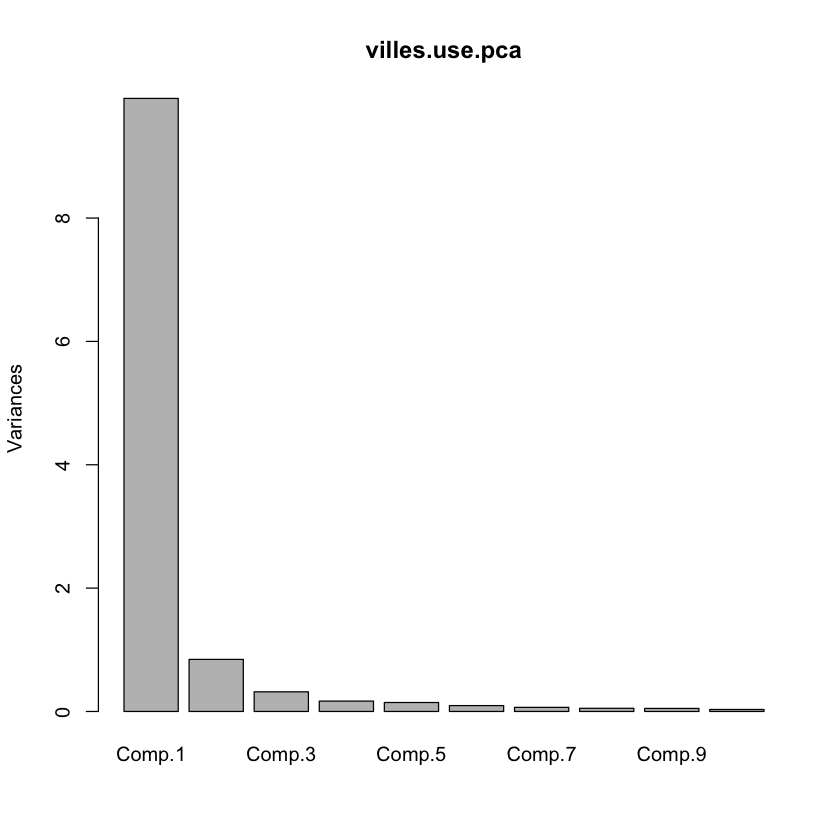

In [25]:
plot(villes.use.pca)

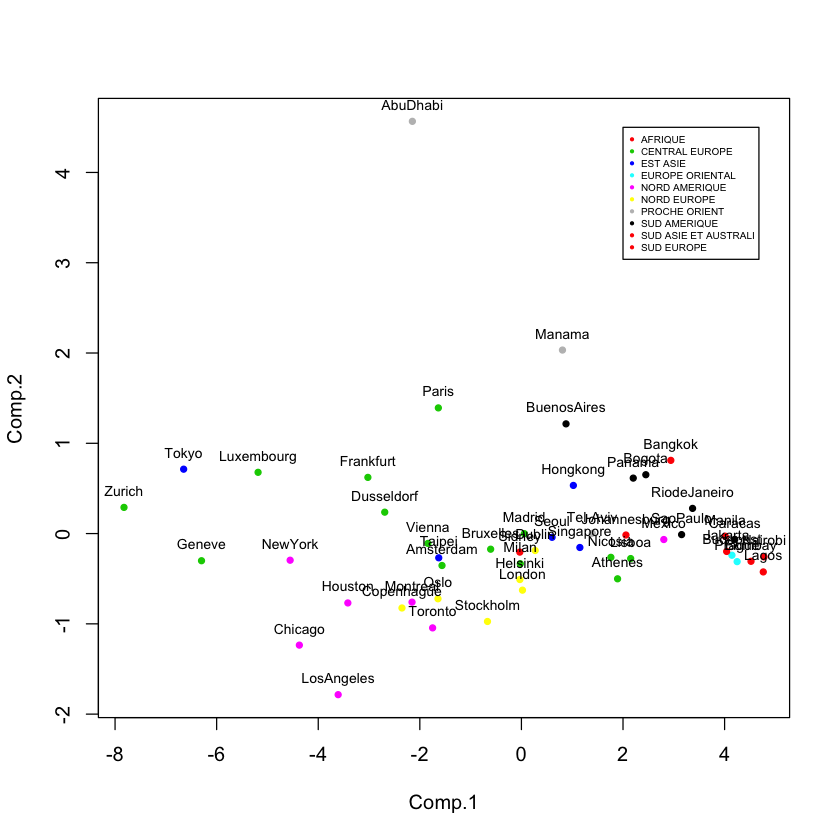

In [26]:
plot(villes.use.pca$scores[,1:2], pch = 20,
     col = as.numeric(villes.use[, "Región.del.mundo"]) + 1)
text(villes.use.pca$scores[,1:2], cex = 0.7, pos = 3,
     labels = sub("94", "", villes.use[,"Ciudad"]))
legend(2,4.5,levels(villes.use[, "Región.del.mundo"]), pch=20,cex=0.5, col=2:nlevels(villes.use[, "Región.del.mundo"]))